# A notebook to test ching.py
and to analyze them further

In [1]:
import scipy as sp
import numpy as np
import matplotlib

import matplotlib.pyplot as plt

import os
import re as re
import matplotlib.patches as mpatches
import pandas as pd

from neurodsp.spectral import compute_spectrum
from neurodsp.filt import filter_signal

from theagamma.ching import ching_coupling
from theoc.oc import load_result

%load_ext lab_black
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format='retina'

/home/stitch/anaconda3/envs/py3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
/home/stitch/anaconda3/envs/py3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#depreca

ModuleNotFoundError: No module named 'lab_black'

In [5]:
file_name = "../data/test_ching.pkl"

In [6]:
ching_coupling(
    num_pop=25000,
    num_stim=2500,
    p_stim=0.02,
    g_e=1.0,
    stim_rate=1,
    stim_mode="drift",
    file_name=file_name,
    output=False,
)

[                                        ----------------------------------------


In [7]:
result = load_result(file_name)

Text(0.5, 1.0, 'Stimulus')

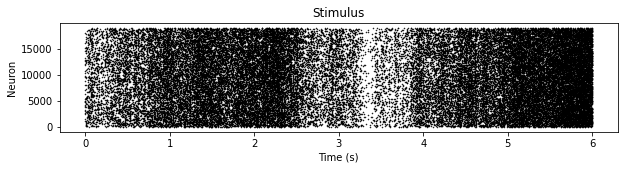

In [8]:
plt.figure(figsize=(10, 2))
plt.plot(*result["spikes"]["stim_p"], ".", markersize=1, color="black")
plt.xlabel("Time (s)")
plt.ylabel("Neuron")
plt.title("Stimulus")

Text(0.5, 1.0, 'Stimulus')

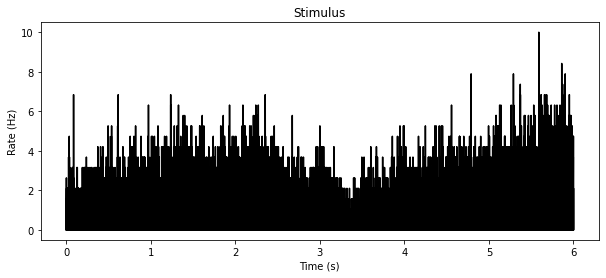

In [9]:
plt.figure(figsize=(10, 4))
plt.plot(*result["rates"]["stim_p"], color="black")
plt.xlabel("Time (s)")
plt.ylabel("Rate (Hz)")
plt.title("Stimulus")

(0.0, 6.0)

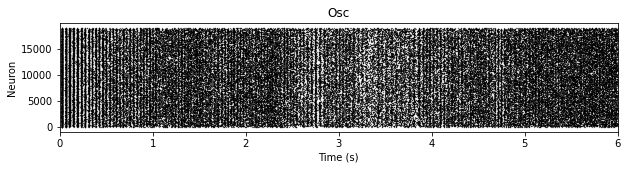

In [10]:
plt.figure(figsize=(10, 2))
plt.plot(*result["spikes"]["E"], ".", markersize=0.5, color="black")
plt.xlabel("Time (s)")
plt.ylabel("Neuron")
plt.title("Osc")
plt.xlim(0, 6)

(0.0, 100.0)

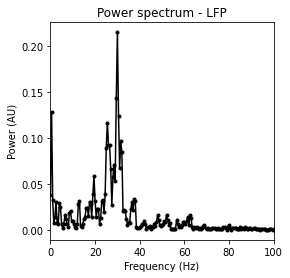

In [15]:
srate = result["srate"]

freqs, spectrum = compute_spectrum(
    result["lfp"]["lfp"],
    fs=srate,
    method="welch",
    avg_type="mean",
    nperseg=srate * 2,
)

plt.figure(figsize=(4, 4))
plt.plot(
    freqs,
    spectrum,
    ".-",
    color="black",
)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power (AU)")
plt.title("Power spectrum - LFP")
plt.xlim(0, 100)

Text(0.5, 1.0, 'Gamma filtered')

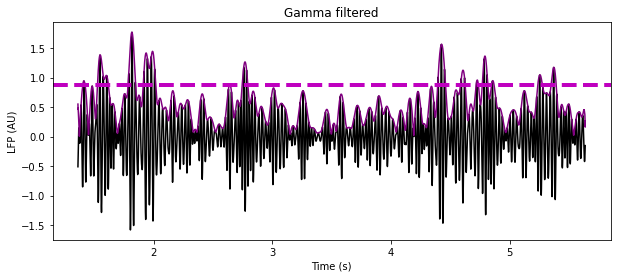

In [16]:
plt.figure(figsize=(10, 4))
plt.plot(
    result["lfp"]["lfp_gamma_times"],
    result["lfp"]["lfp_gamma"],
    color="black",
)
plt.plot(
    result["lfp"]["lfp_gamma_times"],
    result["lfp"]["lfp_gamma_hilbert"],
    color="purple",
)
plt.axhline(
    y=np.mean(result["lfp"]["lfp_gamma_hilbert"])
    + (1 * np.std(result["lfp"]["lfp_gamma_hilbert"])),
    linestyle="--",
    linewidth=4,
    color="m",
)
plt.xlabel("Time (s)")
plt.ylabel("LFP (AU)")
plt.title("Gamma filtered")

(0.1, 6.0)

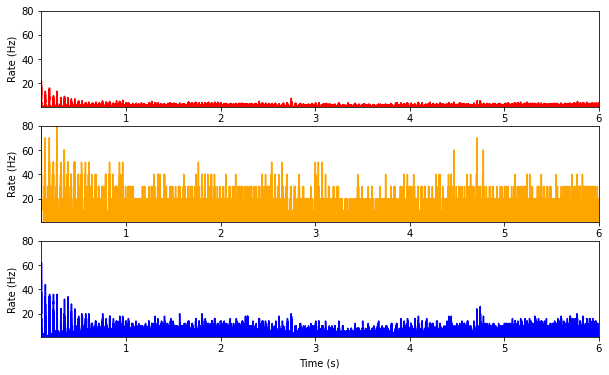

In [17]:
fig, axes = plt.subplots(3, 1, sharey=True, figsize=(10, 6))
axes[0].plot(*result["rates"]["E"], color="red", label="E")
axes[0].set_xlabel("Time (s)")
axes[0].set_ylabel("Rate (Hz)")
axes[0].set_xlim(0.1, 6)
axes[0].set_ylim(1, 80)
axes[1].plot(*result["rates"]["Ech"], color="orange", label="I")
axes[1].set_xlabel("Time (s)")
axes[1].set_ylabel("Rate (Hz)")
axes[1].set_xlim(0.1, 6)
# axes[1].set_ylim(1, 60)
axes[2].plot(*result["rates"]["I"], color="blue", label="I")
axes[2].set_xlabel("Time (s)")
axes[2].set_ylabel("Rate (Hz)")
axes[2].set_xlim(0.1, 6)
# axes[2].set_ylim(1, 60)

Text(0, 0.5, 'Neuron')

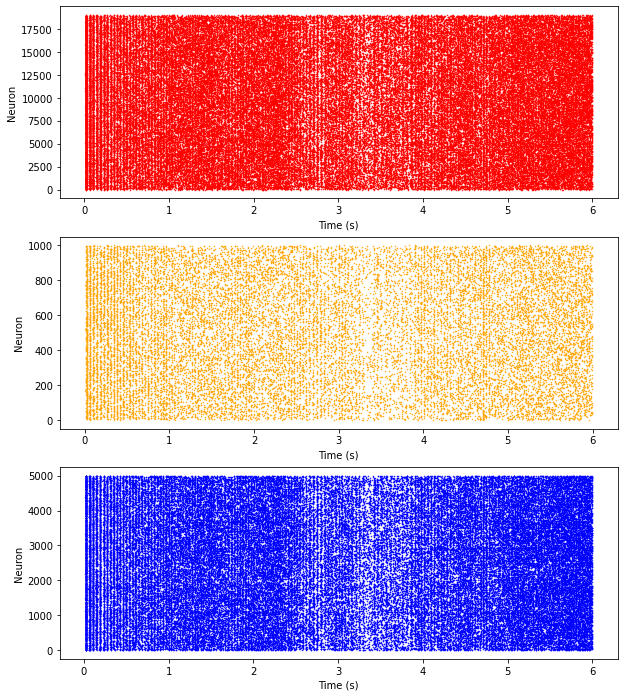

In [18]:
# plt.plot(spikemonIosc.t, spikemonIosc.i, ".", markersize=1, color="black")
fig, axes = plt.subplots(3, 1, sharey=False, figsize=(10, 12))
axes[0].plot(*result["spikes"]["E"], ".", markersize=1, color="red", label="E")
axes[0].set_xlabel("Time (s)")
axes[0].set_ylabel("Neuron")
axes[1].plot(*result["spikes"]["Ech"], ".", markersize=1, color="orange", label="E")
axes[1].set_xlabel("Time (s)")
axes[1].set_ylabel("Neuron")
axes[2].plot(*result["spikes"]["I"], ".", markersize=1, color="blue", label="I")
axes[2].set_xlabel("Time (s)")
axes[2].set_ylabel("Neuron")